In [1]:
# https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_performance_prediction_copied.csv")

In [4]:
df.shape

(40000, 7)

In [5]:
df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [8]:
# df = df.dropna()

In [9]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

In [10]:
df = df[[ 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed']]

In [11]:
df.loc[: , 'Participation in Extracurricular Activities'] = df["Participation in Extracurricular Activities"].apply(lambda x : 1 if x == "Yes" else 0 )

In [12]:
df.loc[: , "Parent Education Level"] = df["Parent Education Level"].replace({
    'Associate': 0 , 
    'Bachelor' : 1 , 
    'Doctorate' : 2 , 
    'High School' : 3, 
    'Master' : 4 
})

/tmp/ipykernel_39830/1155947586.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[: , "Parent Education Level"] = df["Parent Education Level"].replace({


In [13]:
df.loc[: , 'Passed'] = df["Passed"].apply(lambda x : 1 if x == "Yes" else 0 )

In [14]:
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mean(), inplace=True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mean(), inplace=True)
df['Passed'].fillna(df['Passed'].mean(), inplace=True)

/tmp/ipykernel_39830/259547866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
/tmp/ipykernel_39830/259547866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [15]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.276323,75.000000,1,4.0,1
1,9.3,95.300000,60.600000,0,3.0,0
2,13.2,75.276323,64.000000,0,0.0,0
3,17.6,76.800000,62.400000,1,1.0,0
4,8.8,89.300000,72.700000,0,4.0,0
...,...,...,...,...,...,...
39995,15.6,93.800000,51.400000,1,4.0,0
39996,11.3,66.400000,64.200000,0,2.0,1
39997,13.1,65.600000,38.100000,0,1.0,0
39998,14.1,74.900000,65.440107,1,4.0,0


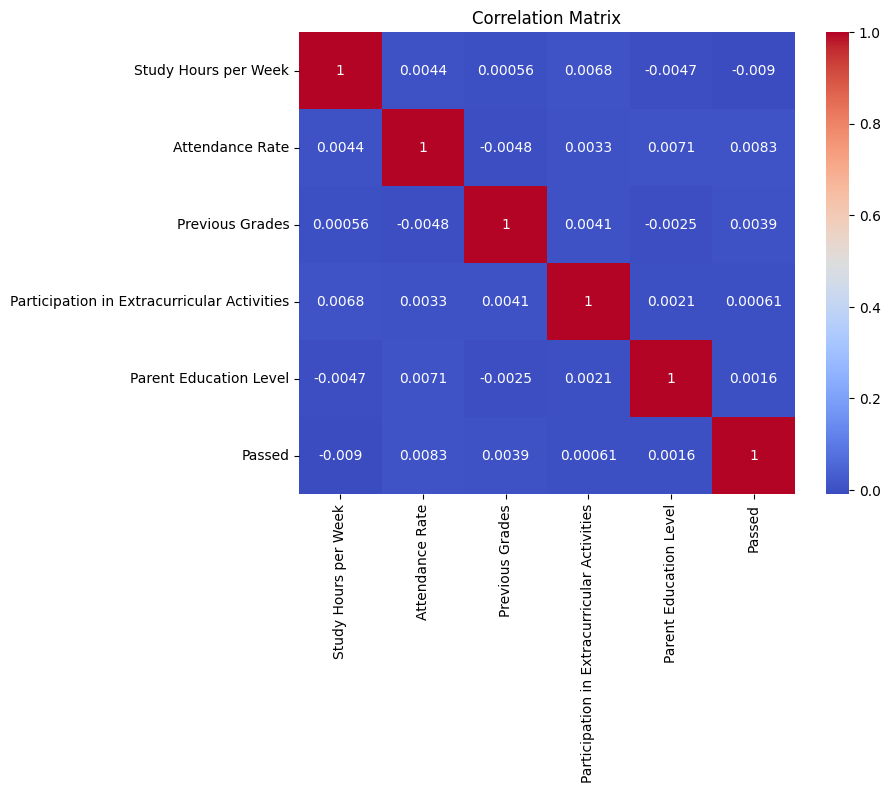

In [16]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [17]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Study Hours per Week                         40000 non-null  int64
 1   Attendance Rate                              40000 non-null  int64
 2   Previous Grades                              40000 non-null  int64
 3   Participation in Extracurricular Activities  40000 non-null  int64
 4   Parent Education Level                       40000 non-null  int64
 5   Passed                                       40000 non-null  int64
dtypes: int64(6)
memory usage: 1.8 MB


In [18]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].astype(int)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

2025-03-09 21:37:07.408897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741536427.430415   39830 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741536427.437190   39830 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 21:37:07.458406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/home/jonah/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741536430.278070   39830 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1958 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


I0000 00:00:1741536432.680233   39893 service.cc:148] XLA service 0x7de394005a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741536432.680275   39893 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-09 21:37:12.746154: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741536432.929740   39893 cuda_dnn.cc:529] Loaded cuDNN version 90300


  50/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5051 - loss: 6.6071

I0000 00:00:1741536434.472986   39893 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5075 - loss: 2.1864 - val_accuracy: 0.5265 - val_loss: 0.6919
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5191 - loss: 0.6952 - val_accuracy: 0.5265 - val_loss: 0.6918
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5183 - loss: 0.6938 - val_accuracy: 0.5265 - val_loss: 0.6918
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5239 - loss: 0.6928 - val_accuracy: 0.5265 - val_loss: 0.6918
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5254 - loss: 0.6923 - val_accuracy: 0.5265 - val_loss: 0.6917
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5232 - loss: 0.6921 - val_accuracy: 0.5265 - val_loss: 0.6917
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5300 - loss: 0.6914 - val_accuracy: 0.5265 - val_loss: 0.6918
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5241 - loss: 0.6920 - val_accurac

In [24]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"TensorFlow Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
TensorFlow Model Accuracy: 0.5265
Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      4212
           1       0.00      0.00      0.00      3788

    accuracy                           0.53      8000
   macro avg       0.26      0.50      0.34      8000
weighted avg       0.28      0.53      0.36      8000



/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=33)

In [26]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 30000 entries, 39052 to 23572
Series name: Passed
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 468.8 KB


In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
models = {
    "LogisticRegression" : LogisticRegression(max_iter=1000),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3),
    "svm" : SVC(kernel='linear'),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "GaussianNB" : GaussianNB(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=5),
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

In [29]:



results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    # print(f"Model: {name} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})    

# Convert results to DataFrame for tabular display
df_results = pd.DataFrame(results)
print(df_results)

                        Model  Accuracy  Precision  Recall  F1-Score
0          LogisticRegression    0.5296   0.646349  0.5296  0.367633
1        KNeighborsClassifier    0.5019   0.501906  0.5019  0.501903
2                         svm    0.5291   0.279947  0.5291  0.366159
3      RandomForestClassifier    0.5293   0.517673  0.5293  0.388240
4                  GaussianNB    0.5290   0.515237  0.5290  0.394414
5      DecisionTreeClassifier    0.5186   0.503631  0.5186  0.471433
6  GradientBoostingClassifier    0.5270   0.512814  0.5270  0.446115
7           Gradient Boosting    0.5251   0.506558  0.5251  0.432686


In [30]:
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.5296,0.646349,0.5296,0.367633
1,KNeighborsClassifier,0.5019,0.501906,0.5019,0.501903
2,svm,0.5291,0.279947,0.5291,0.366159
3,RandomForestClassifier,0.5293,0.517673,0.5293,0.388240
4,GaussianNB,0.5290,0.515237,0.5290,0.394414
5,DecisionTreeClassifier,0.5186,0.503631,0.5186,0.471433
6,GradientBoostingClassifier,0.5270,0.512814,0.5270,0.446115
7,Gradient Boosting,0.5251,0.506558,0.5251,0.432686


In [31]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)  # Train model
y_pred = model.predict(X_test)  # Predict on test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Accuracy: 0.5293 | Precision: 0.5177 | Recall: 0.5293 | F1-Score: 0.3882


In [32]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [33]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12,75,75,1,4,1
1,9,95,60,0,3,0
2,13,75,64,0,0,0
3,17,76,62,1,1,0
4,8,89,72,0,4,0
...,...,...,...,...,...,...
39995,15,93,51,1,4,0
39996,11,66,64,0,2,1
39997,13,65,38,0,1,0
39998,14,74,65,1,4,0


In [34]:
model = pickle.load(open('model.pkl', 'rb'))
input_data = np.array([[17, 100, 100, 1, 4]])  
# Predict
prediction = model.predict(input_data)

# Interpret the result
if prediction[0] == 1:
    print("The student is predicted to PASS.")
else:
    print("The student is predicted to FAIL.")

The student is predicted to FAIL.


/home/jonah/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
